In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn
seaborn.set()

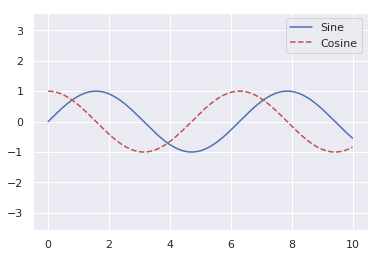

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend()

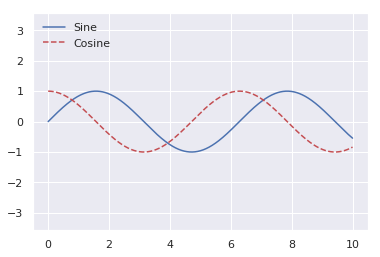

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

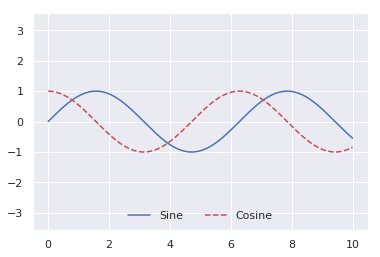

In [5]:
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

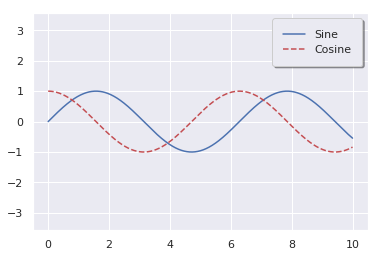

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### 凡例要素の選択

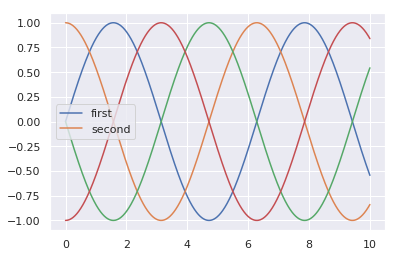

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

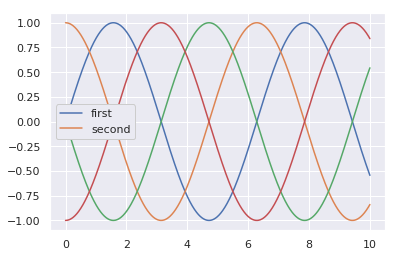

In [8]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

### 点サイズの判例

In [13]:
import pandas as pd

In [14]:
cities = pd.read_csv('../data/california_cities.csv')
cities = cities.drop('Unnamed: 0', axis=1)

In [15]:
cities.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


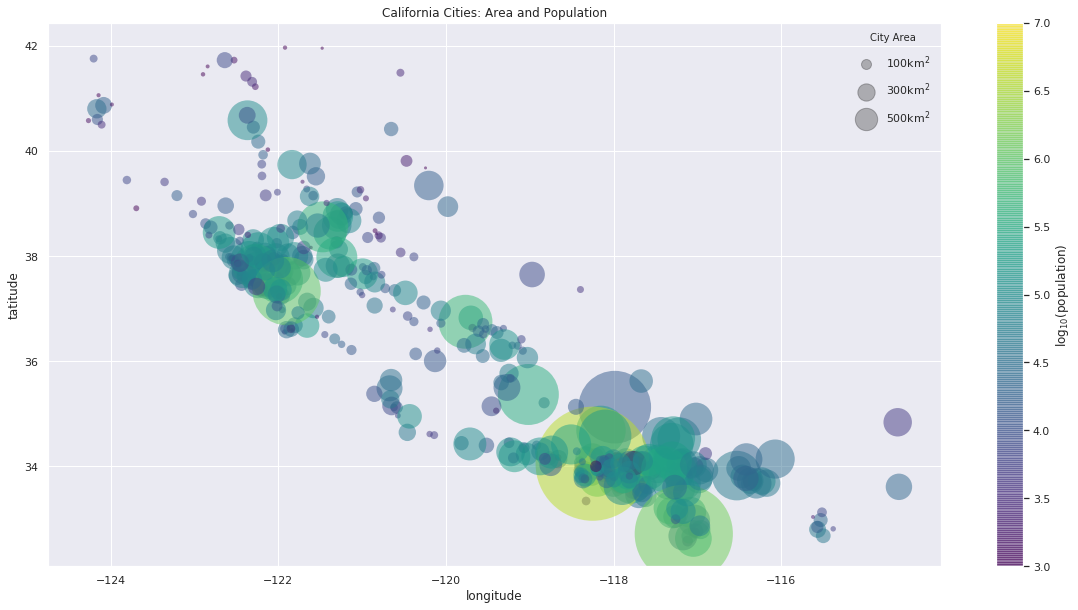

In [16]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.figure(figsize=(20, 10))

plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area*10, linewidths=0, alpha=0.5)
plt.axis(aspect='equals')
plt.xlabel('longitude')
plt.ylabel('tatitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
    
    plt.title('California Cities: Area and Population')

### 複数の判例

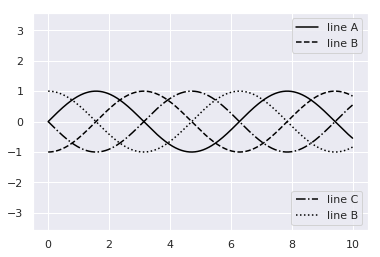

In [20]:
fig, ax = plt.subplots()
lines = []
style = ['-', '--', '-.', ':']

x = np.linspace(0,10,1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x-i * np.pi/2), style[i], color='black')

ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon='False')
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line B'], loc='lower right', frameon='False')
ax.add_artist(leg)